In [32]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


from sklearn.preprocessing import StandardScaler

data = pd.read_csv("heart.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#data visualization

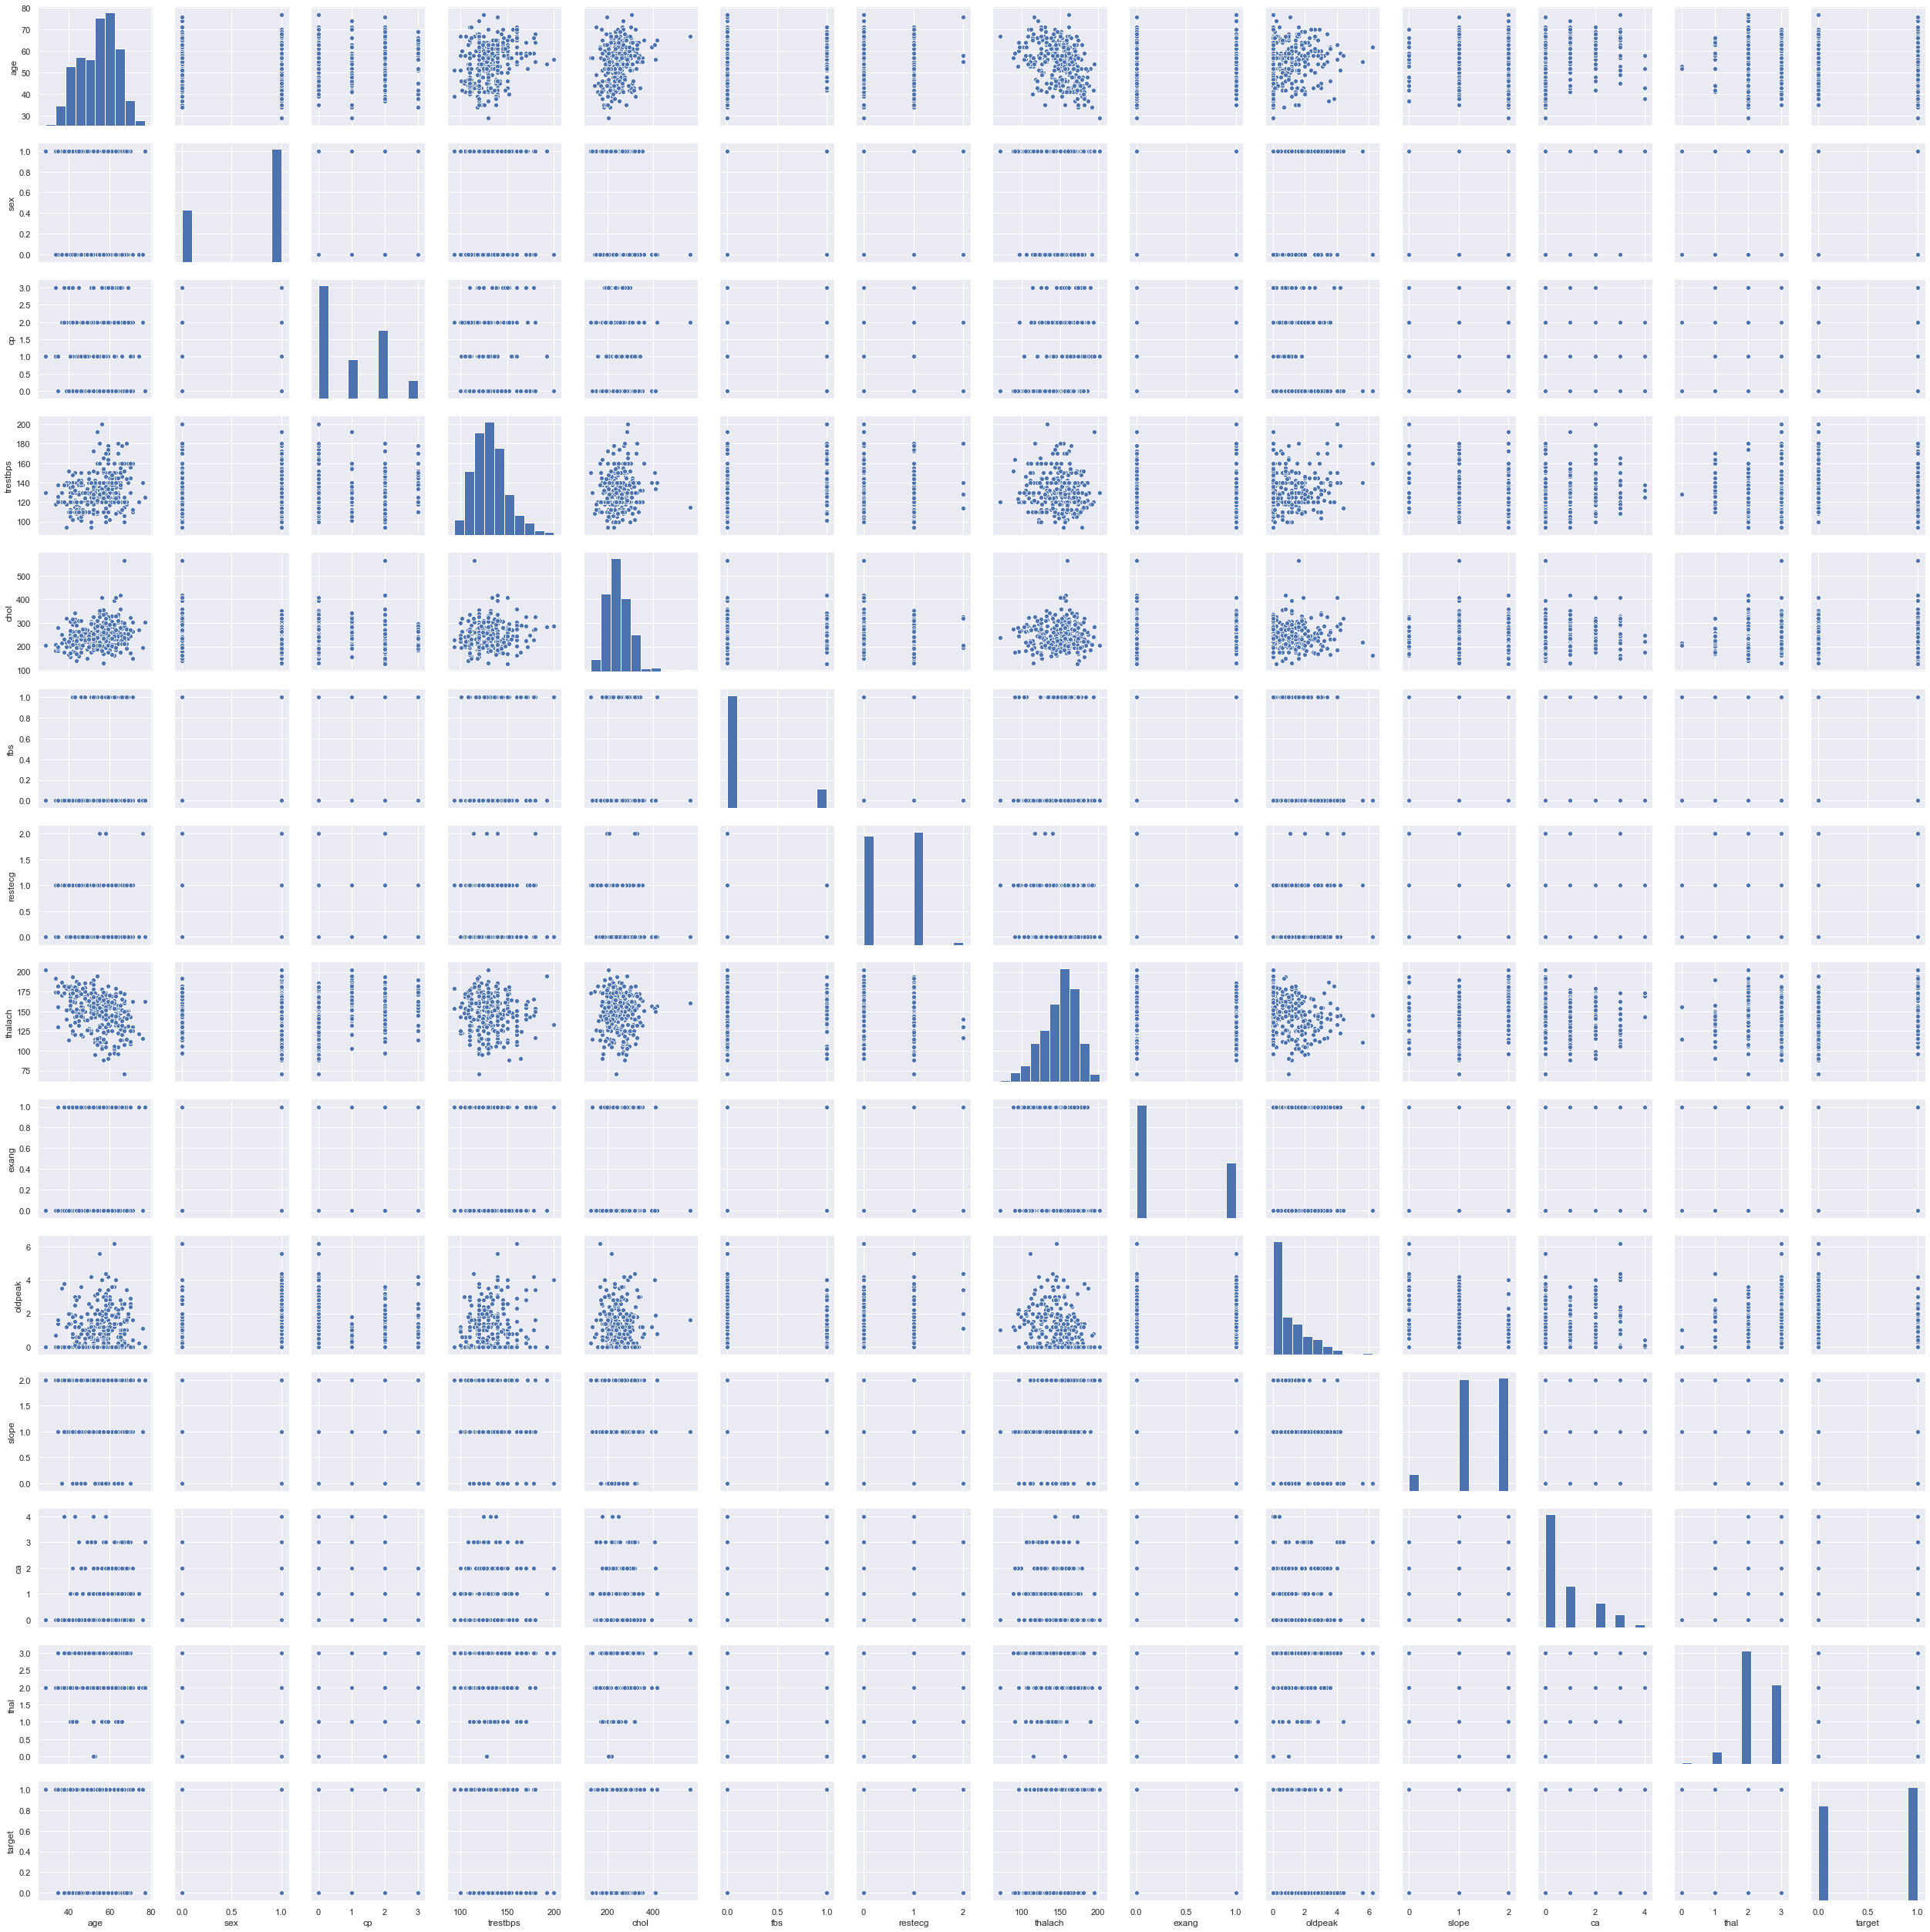

In [6]:
sns.pairplot(data)
plt.show()

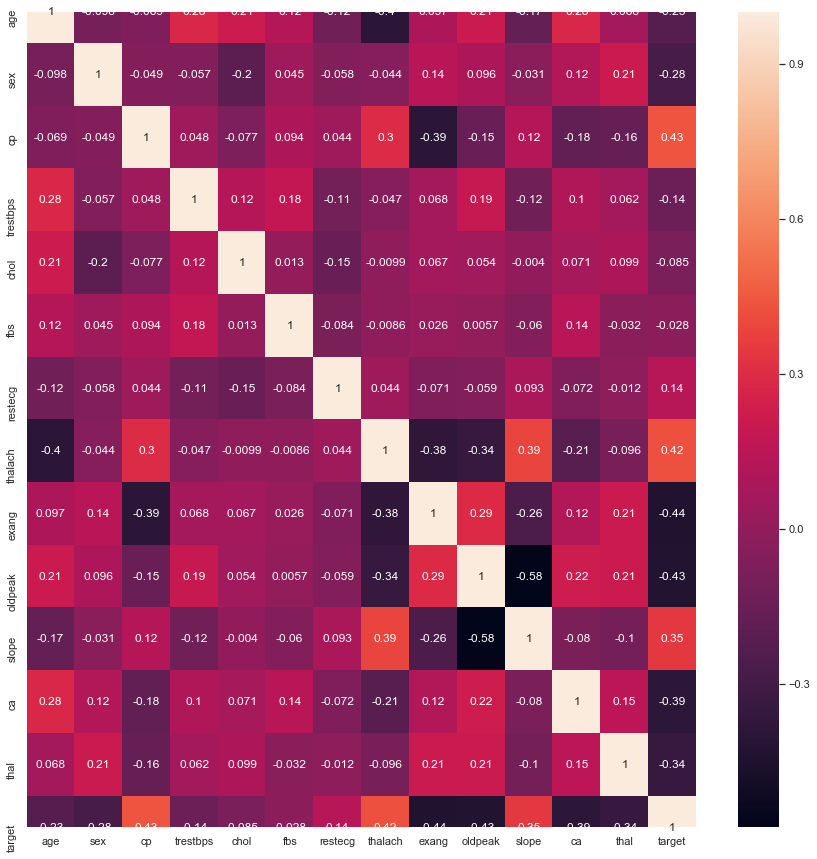

In [7]:
correlation = data.corr()
plt.figure(1,figsize = (15,15))
sns.heatmap(correlation,annot=True)

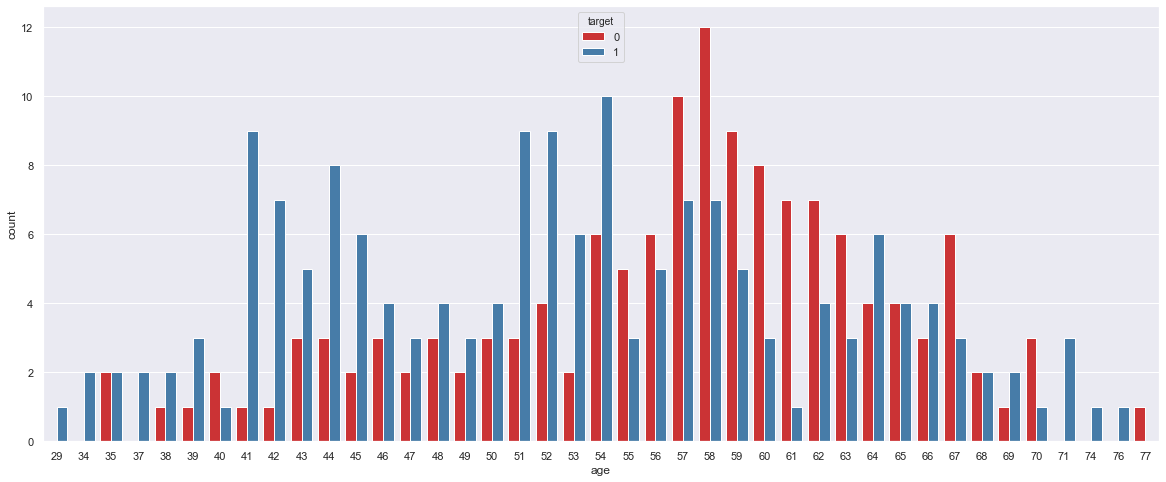

In [8]:
plt.figure(figsize=(20,8))
sns.countplot(x='age',data = data ,hue = 'target',palette='Set1')
plt.show()

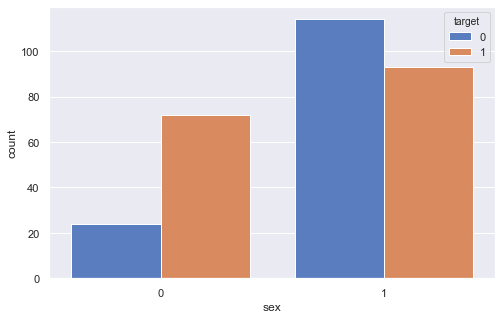

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='sex', data = data ,hue = 'target',palette='muted')
plt.show()

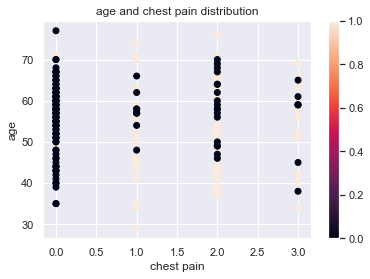

In [10]:
# cp is chest pain rate. 
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['cp'],data['age'],c=data.target)
ax.set_title("age and chest pain distribution")
ax.set_xlabel('chest pain')
ax.set_ylabel('age')
plt.colorbar(scatter)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

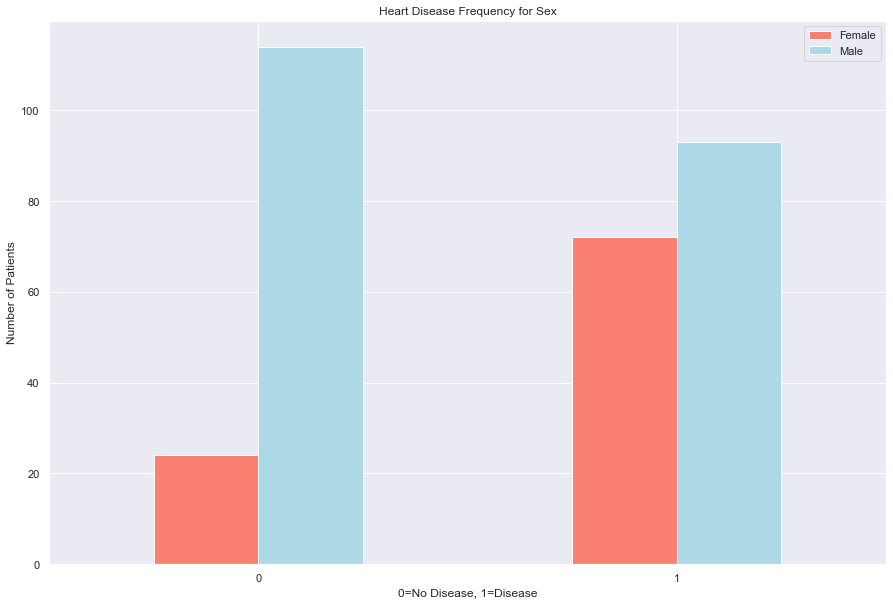

In [11]:
pd.crosstab(data['target'], data.sex).plot(kind='bar', figsize=(15,10),color=['salmon', 'lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Number of Patients")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

In [12]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [33]:
data.shape

(303, 14)

In [34]:
#feature scaling
scaler = StandardScaler()

In [ ]:
#ss = StandardScaler()
#df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)

In [ ]:
scaler.fit_transform(data.drop(['target'],axis=1)),columns=X_train.columns

In [35]:
X=data.drop(['target'],axis=1)

In [37]:
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

C:\Users\duvindu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\duvindu\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
#X = pd.DataFrame()
y = data.target

In [40]:
X.shape,y.shape

((303, 13), (303,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27  2]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

   micro avg       0.92      0.92      0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [45]:
#accuracy 
accuracy_score(y_test,y_pred)

0.9180327868852459

In [22]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
tree_y_pred = tree.predict(X_test)

In [24]:
print(confusion_matrix(y_test, tree_y_pred))
print(classification_report(y_test,tree_y_pred))

[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [25]:
accuracy_score(y_test,tree_y_pred)

0.8360655737704918

In [47]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
forest_pred = forest.predict(X_test)

In [49]:
print(confusion_matrix(y_test,forest_pred))
print(classification_report(y_test, forest_pred))

[[24  5]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [50]:
accuracy_score(y_test,forest_pred)

0.8524590163934426

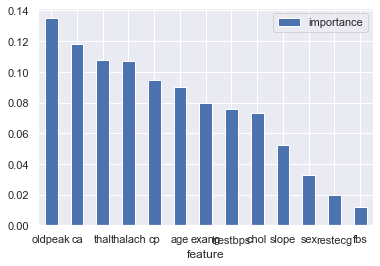

In [51]:
#model.fit(X_train,Y_train)
importance = pd.DataFrame({'feature':X_train.columns, 'importance': np.round(forest.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=0)
plt.show()